In [378]:
import scipy, sympy, pylab, math, pandas as pd, numpy as np
import matplotlib, matplotlib.pyplot as plt, matplotlib.pylab as plt2
import networkx as nx, itertools as it
import seaborn as sns ### plotly.plotly as py, plotly.graph_objs as go, plotly.tools as tls
from __future__ import division
from collections import Counter
# from sympy.printing import latex
from IPython.display import set_matplotlib_formats
# from ipywidgets import interact
# import bokeh.io as bio
# from bokeh.plotting import figure, show, output_notebook #, output_file
# from bokeh.models import HoverTool, Line, TapTool, CustomJS, ColumnDataSource


matplotlib.rcParams.update({'font.size': 12, 'font.family': 'calibri', 'mathtext.fontset': 'stix'})
set_matplotlib_formats('png', 'pdf')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# py.sign_in("joknowle", "h1w8dn6q7h")
# <nbformat>2</nbformat>
# <markdowncell>
#init_printing(use_latex='mathjax')
#init_printing()

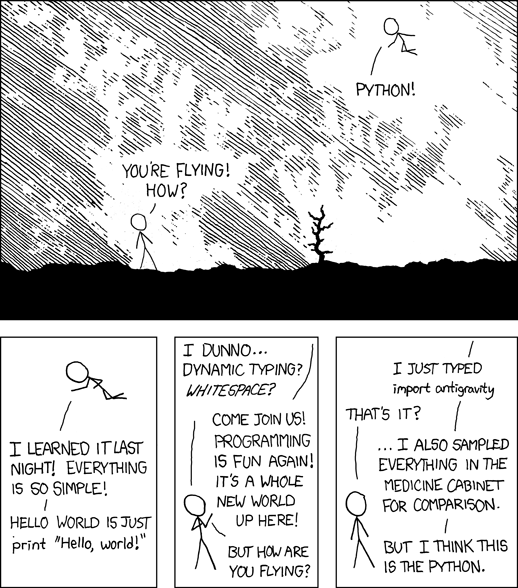

In [379]:
from IPython.display import Image
Image('http://imgs.xkcd.com/comics/python.png')

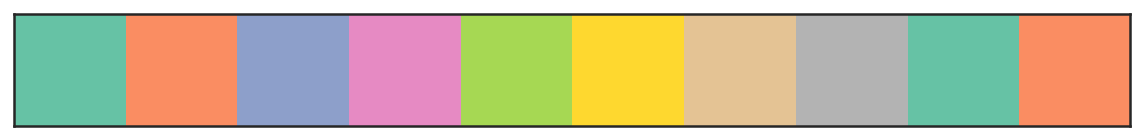

In [380]:
#help(sympy) #(Read: "HELP SENPAI!")
# from matplotlib import lines
# lines.lineStyles.keys()
# lines.lineMarkers

# Bokeh output graph to file:
#output_notebook()

#Color Schemes:
sns.set()
sns.set_context("paper")
current_palette = sns.color_palette("Set2", 10)
sns.set(style="white", palette=current_palette)
sns.palplot(current_palette)

In [381]:
def motion(): #initial x = 0, 1000 random steps of unit one.
    x = np.zeros(1001);
    for i, j in enumerate(n):
        x[i] += x[i-1] + np.random.choice([-1,1]) # equi-probable left-right move
    return x
oneS = list(motion());  # Random Walk for 1 Particle
tenS = [list(motion()) for k in range(10)] #Random Walks for 10 Particles

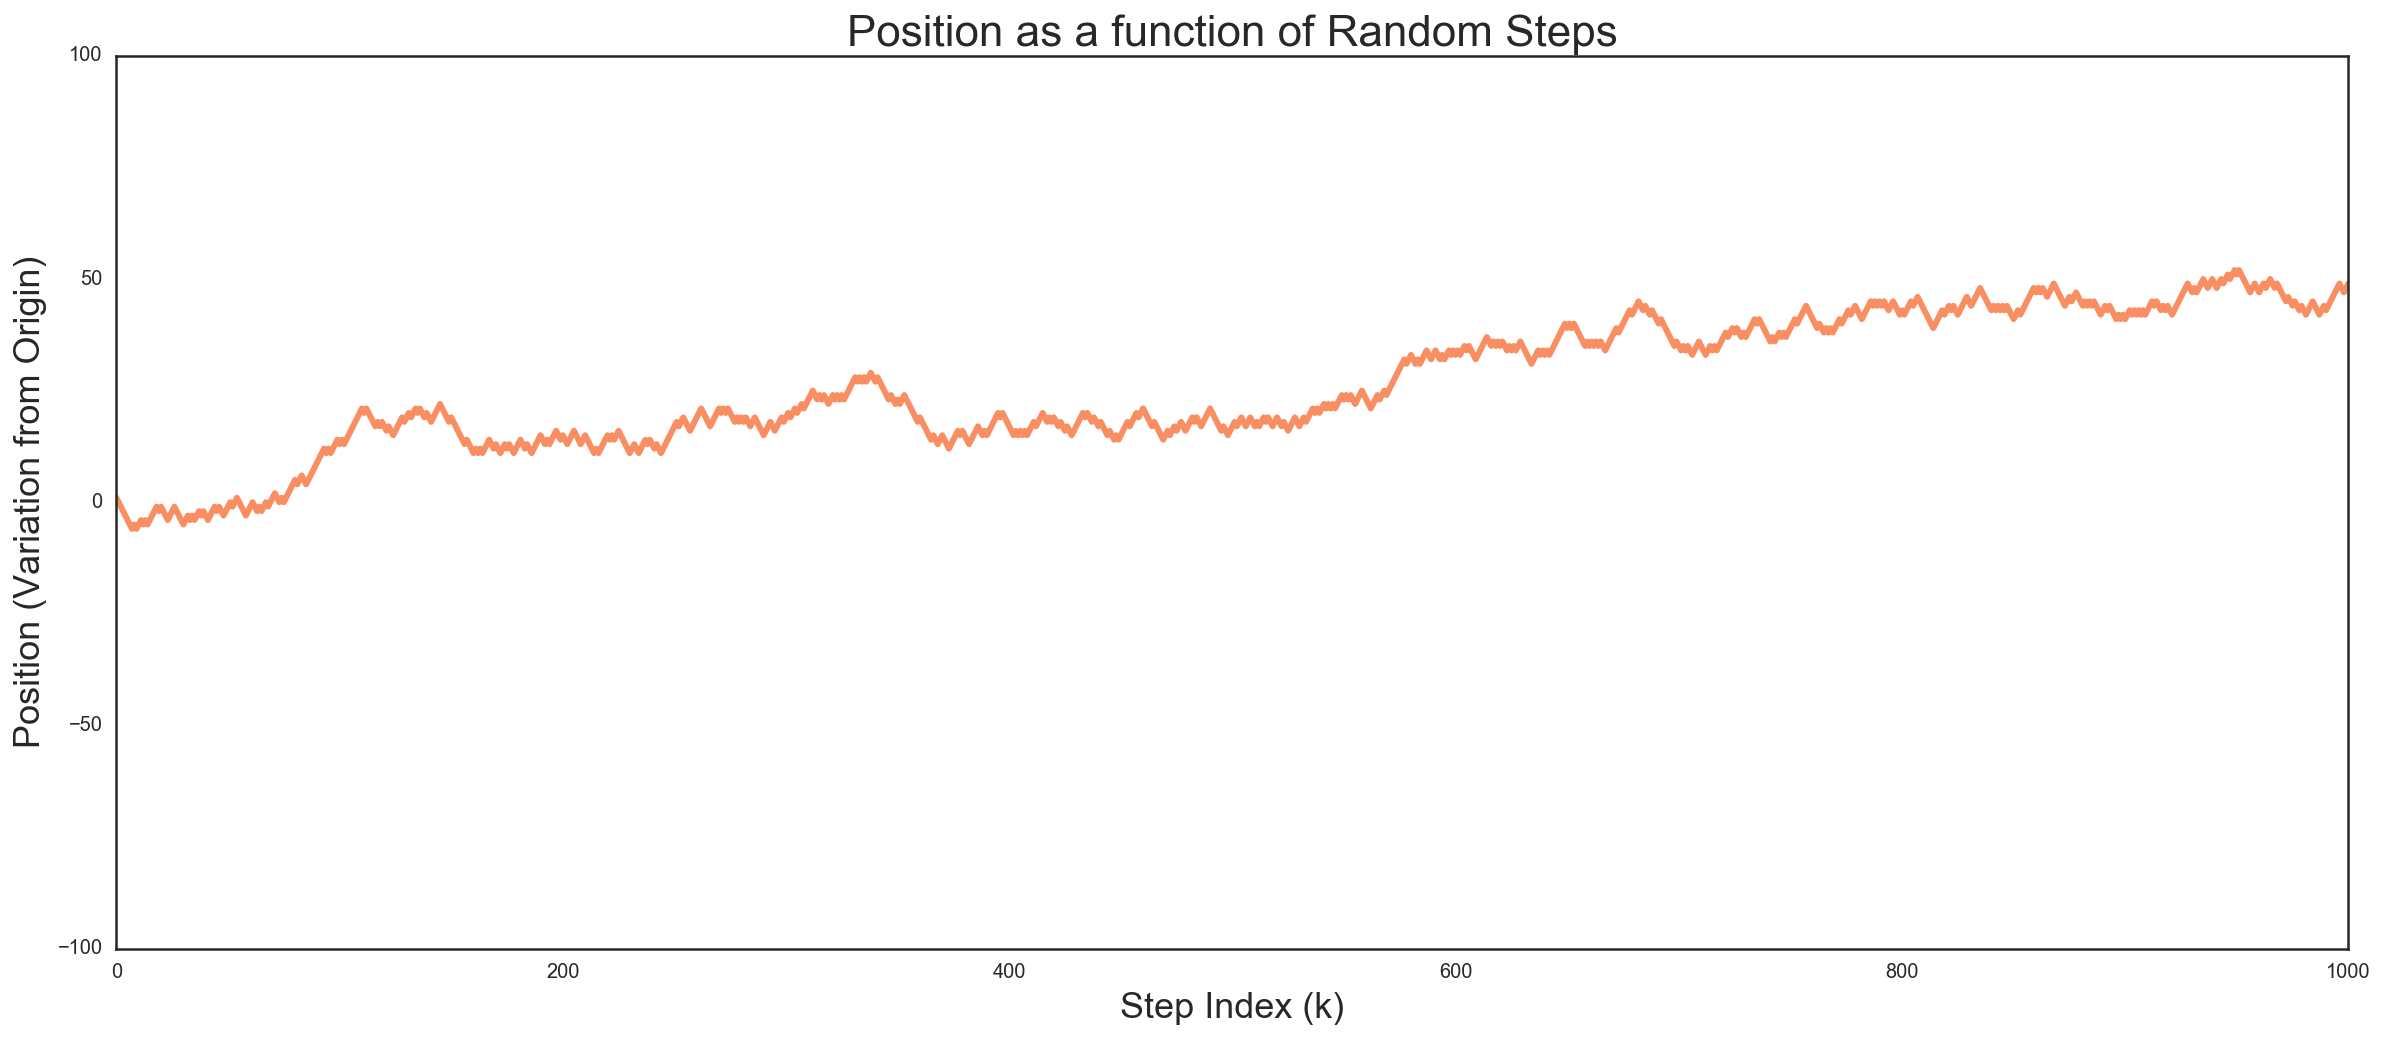

In [382]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in oneS:
    ax.plot(i)
ax.set_ylabel("Position (Variation from Origin)", fontsize = 18);
ax.set_xlabel('Step Index (k)', fontsize = 18);
plt.title('Position as a function of Random Steps', fontsize = 22)
plt.axis([0, 1000, -100, 100])
plt.plot(oneS, lineStyle = '-', linewidth = '3')
mpl_fig1 = plt.gcf()
plt.show();

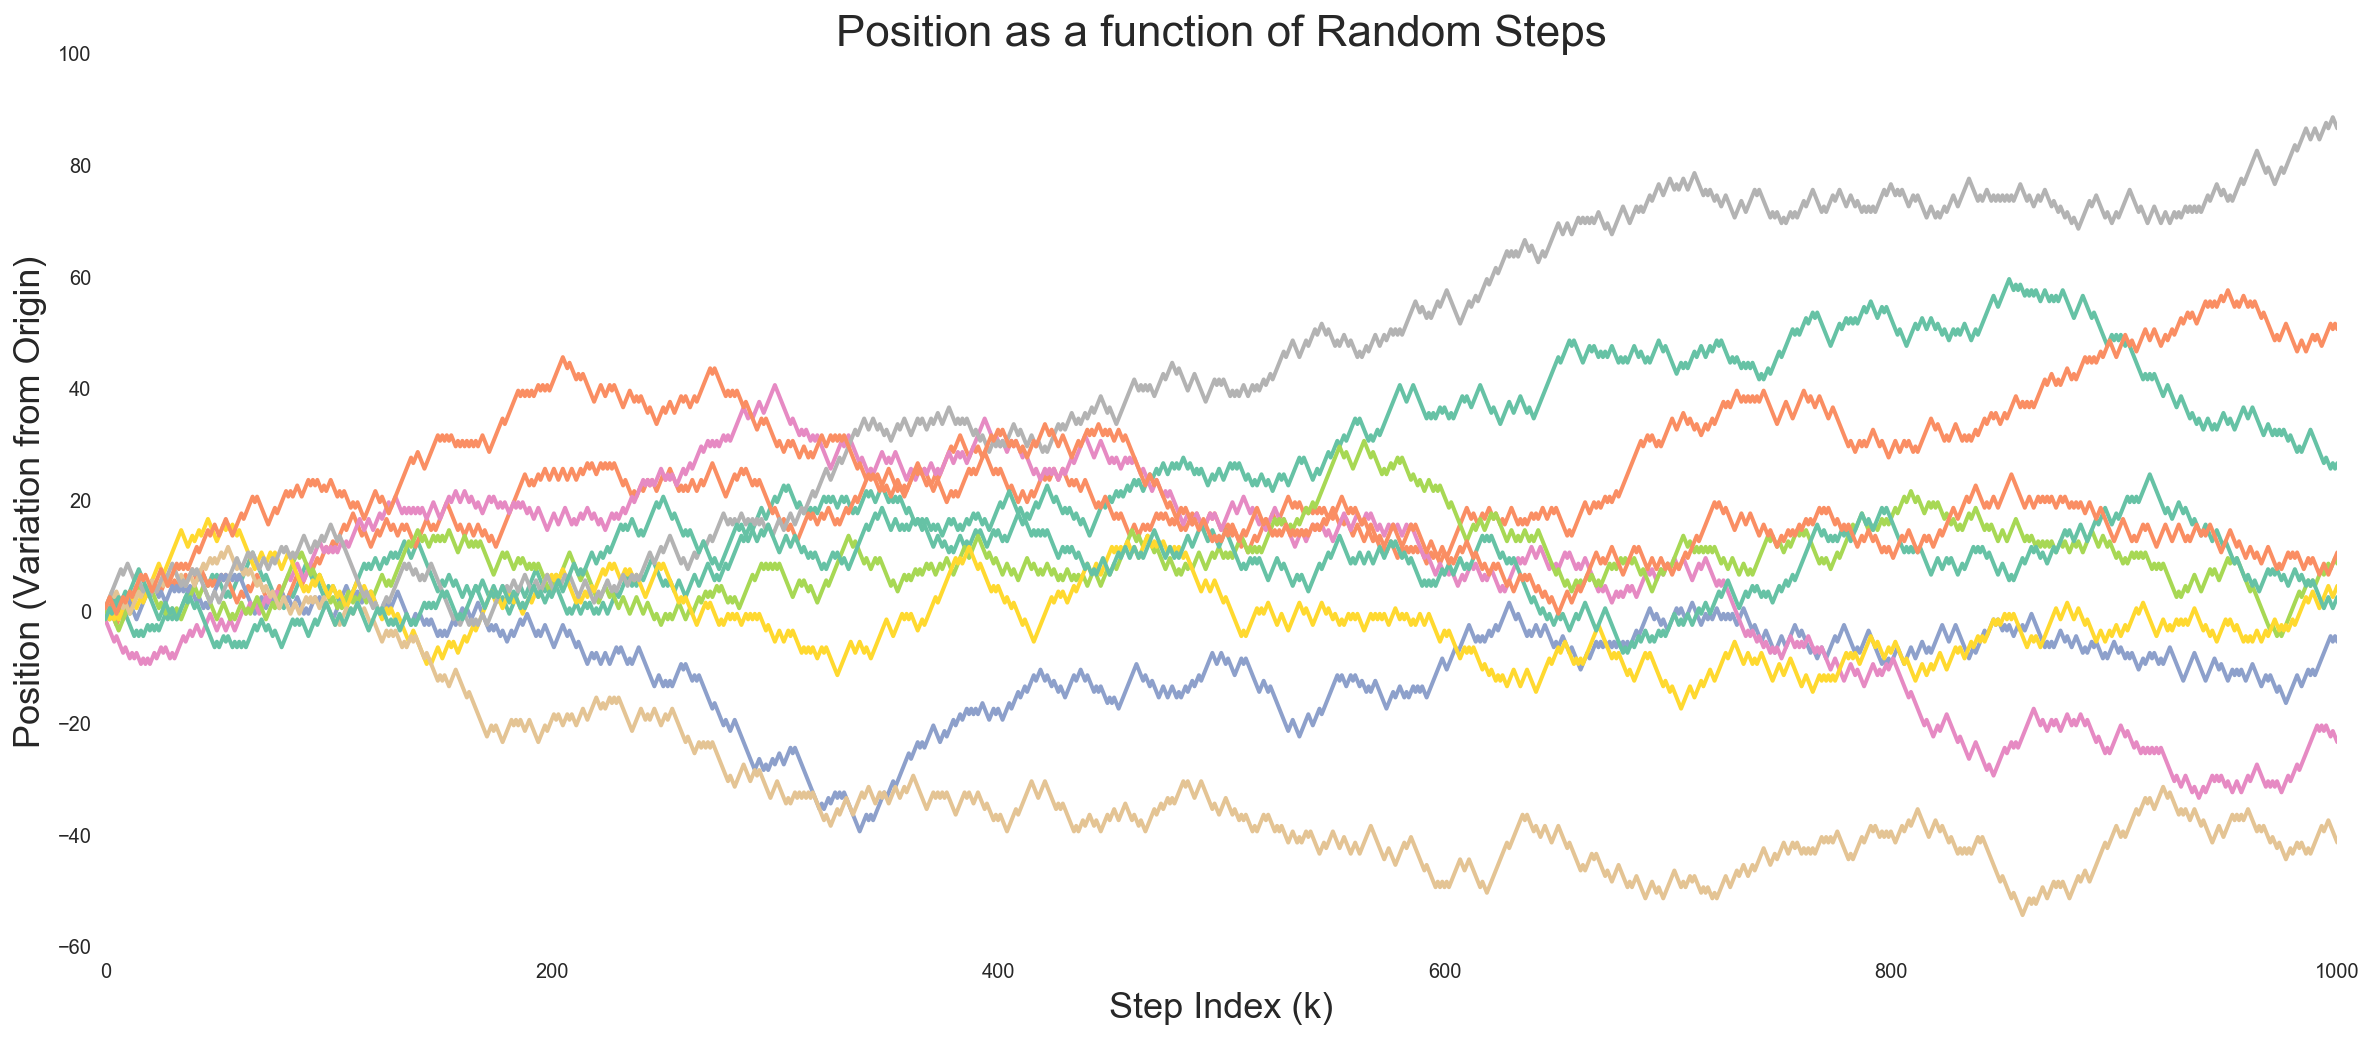

In [383]:
fig, ax = plt.subplots(figsize=(20, 8));
for i in tenS:
    ax.plot(i, lineStyle = '-', linewidth = '2');
ax.set_ylabel("Position (Variation from Origin)", fontsize = 18);
ax.set_xlabel('Step Index (k)', fontsize = 18);
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on") 
plt.title('Position as a function of Random Steps', fontsize = 22)
plt.show();

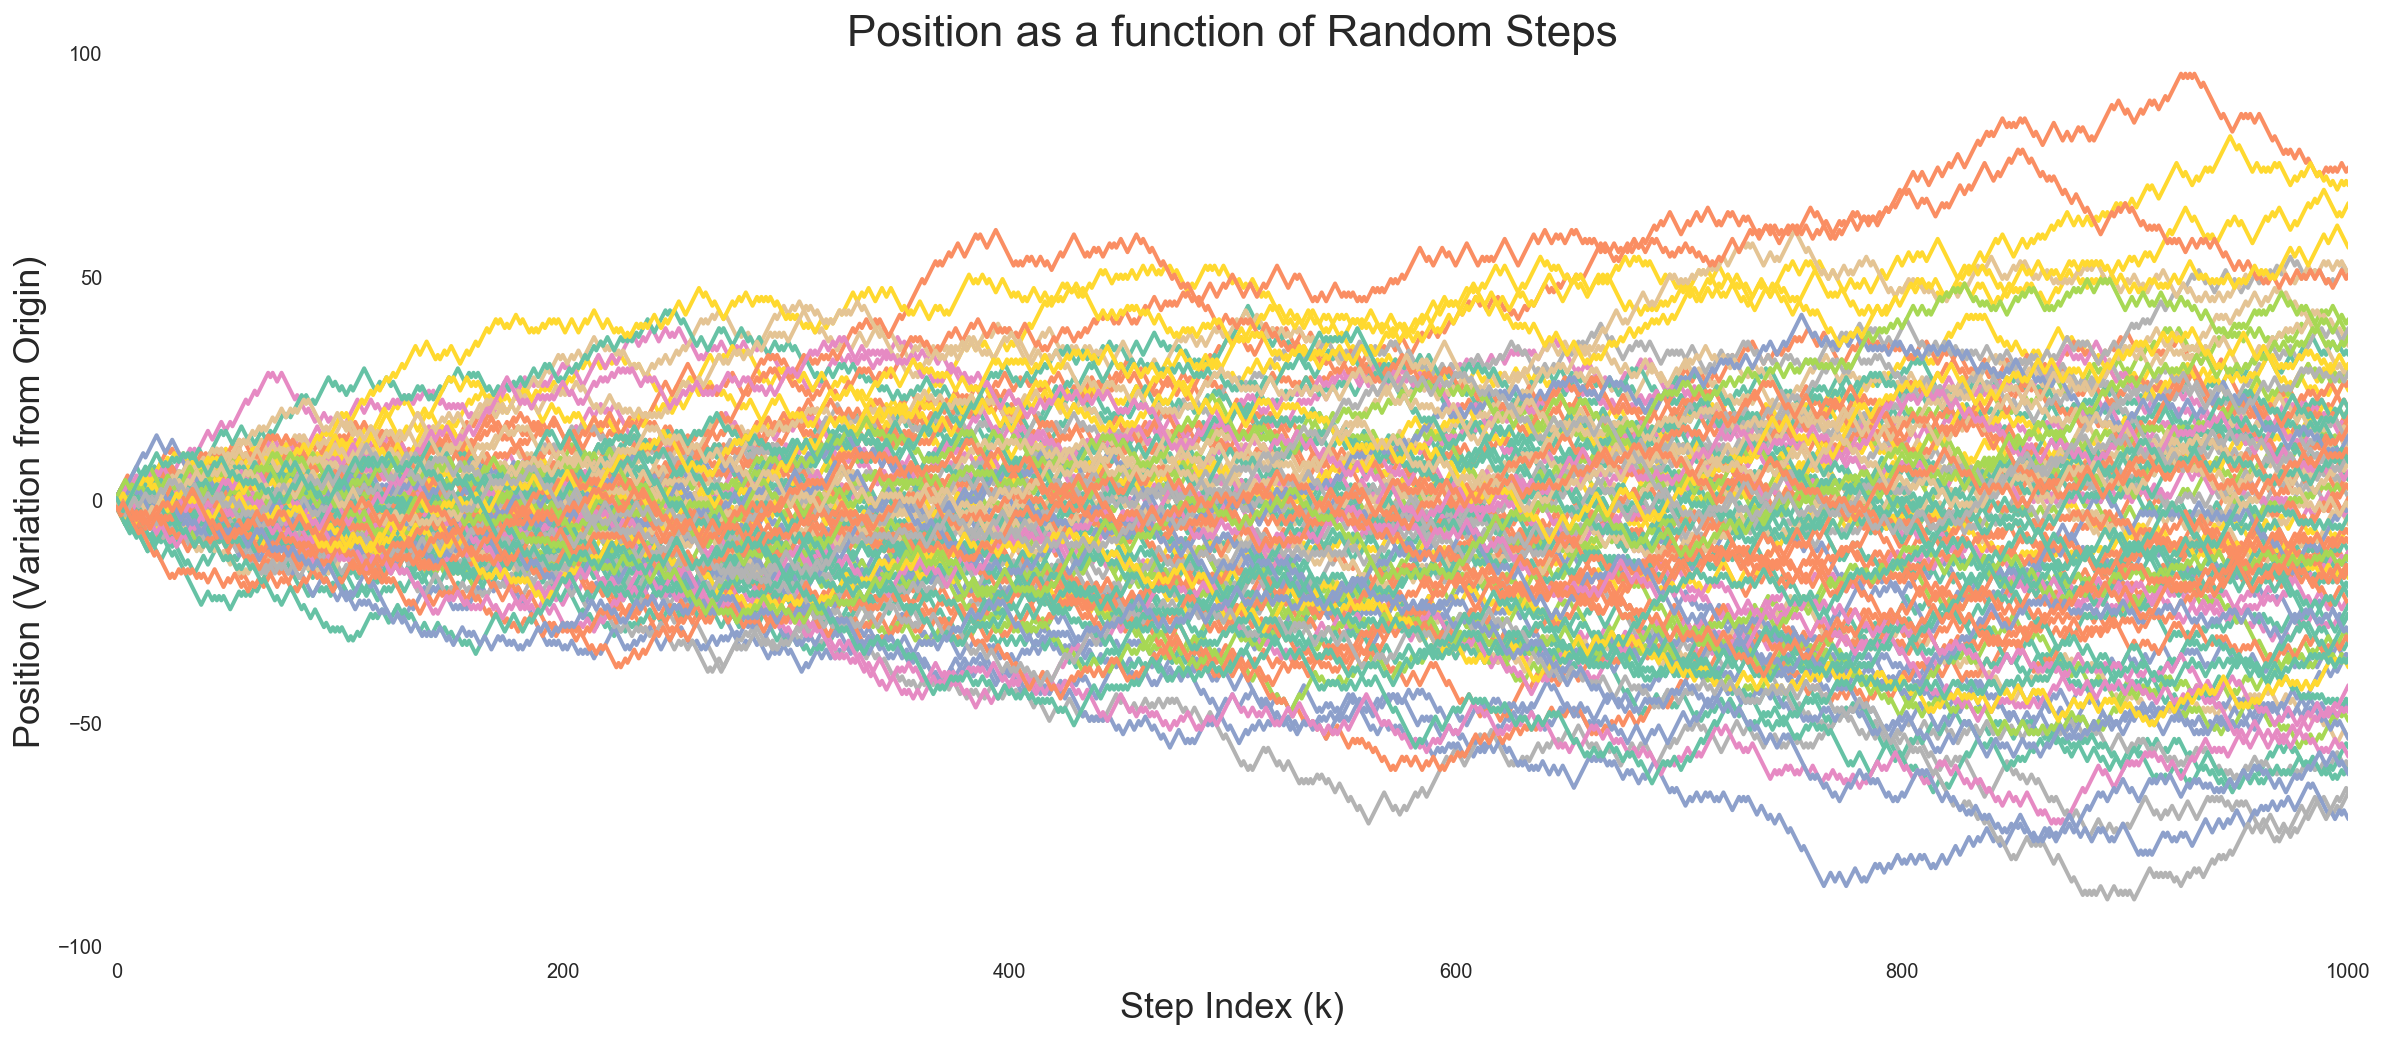

In [384]:
def motion(): #initial x = 0, 1000 random steps of unit one.
    x = np.zeros(1001);
    for i, j in enumerate(n):
        x[i] += x[i-1] + np.random.choice([-1,1]) # equi-probable left-right move
    return x
tenS = [list(motion()) for k in range(100)] #Random Walks for 100 Particles
fig, ax = plt.subplots(figsize=(20, 8));
for i in tenS:
    ax.plot(i, lineStyle = '-', linewidth = '2');
ax.set_ylabel("Position (Variation from Origin)", fontsize = 18);
ax.set_xlabel('Step Index (k)', fontsize = 18);
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on") 
plt.title('Position as a function of Random Steps', fontsize = 22)
plt.show();

Q1: Looking at the 10 graphs you get each time, and hitting Manually Calculate several times, do you see any graphs that end exactly at x1000 = 0? If so, does this occur frequently or rarely? 
Q2: Looking at the 10 graphs you get each time, what would you estimate the average value of x1000 is? Give your reasoning. (Note: Your reasoning should be based on your data, not on what you think “ought” to happen.) Can you also explain why this “ought” to be the average?
Q3: As N increases, does the spread of the random walks – that is, the variation from most negative to most positive – increase, decrease, or stay about the same?
Q4: Does the spread increase linearly with N? Faster than linear? Less than linear? To answer this question, compare the spread – over many hits of Manually Calculate – at N = 1000 to the spread at N = 100. Because there’s no spread at N = 0, a linear increase in spread would mean that the N = 1000 spread is 10 times the N = 100 spread. 

Note: Q1–Q4 are asking for your conclusions based simply on LOOKING at the graphs. You shouldn’t be doing any calculations. Drawing conclusions from graphs is an important skill.

For Part 1, turn in 1 graph showing the ten random walks and the answers to questions Q1 – Q4.


**Q1**
Yes, sometimes it does end on 0. 
**Q2**
The average would lie around the origin, or in this case, 0. 
**Q3**
The spread increases, but the average remains pretty similar.
**Q4**
Linearly, I would say. 

In [385]:
Steps = 1000;
def rMotion2D(Steps):
    xPos = np.zeros(Steps); yPos = np.zeros(Steps); xs = ys = 0; 
    xPos[0] = xs; yPos[0] = ys;
    for i in range(1, Steps):
        choice = np.random.randint(0,3)
        if choice == 0:
            xs += 1 # move right
        elif choice == 1:
            ys += 1 # move up
        elif choice == 2:
            xs -= 1 # move left
        else:
            ys -= 1 # move down
        xPos[i] = xs;
        yPos[i] = ys;
    return xPos, yPos

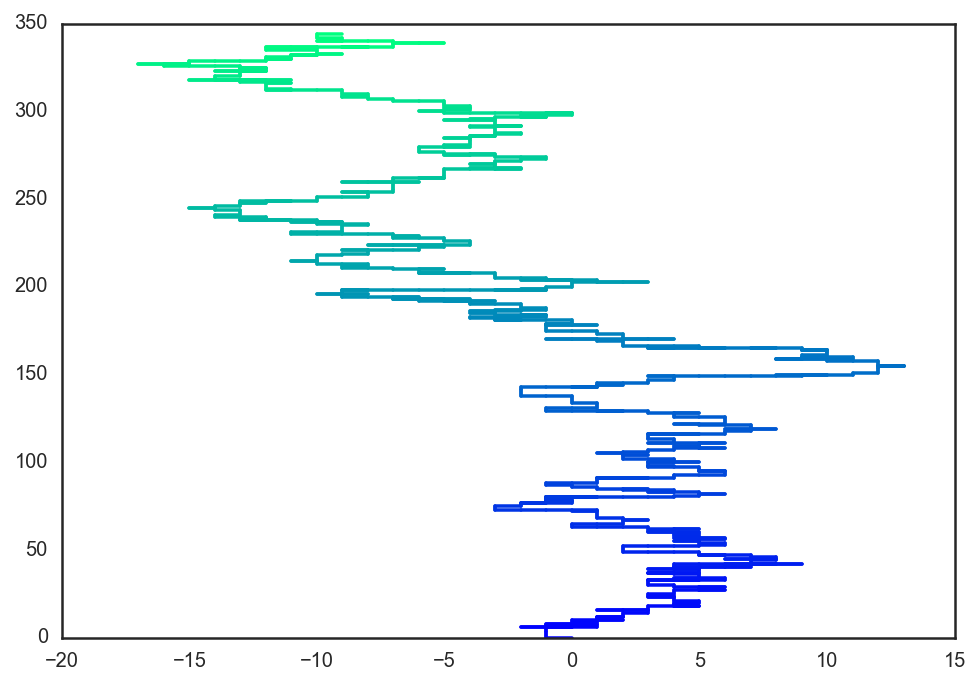

In [386]:
import warnings
warnings.filterwarnings('ignore')
colors = plt.get_cmap('winter')
Xpos, Ypos = rMotion2D(Steps)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_color_cycle([colors(1.*i/(Steps - 1)) for i in range(Steps - 1)])
for i in range(Steps - 1):
    plt.plot(Xpos[i:i+2], Ypos[i:i+2])

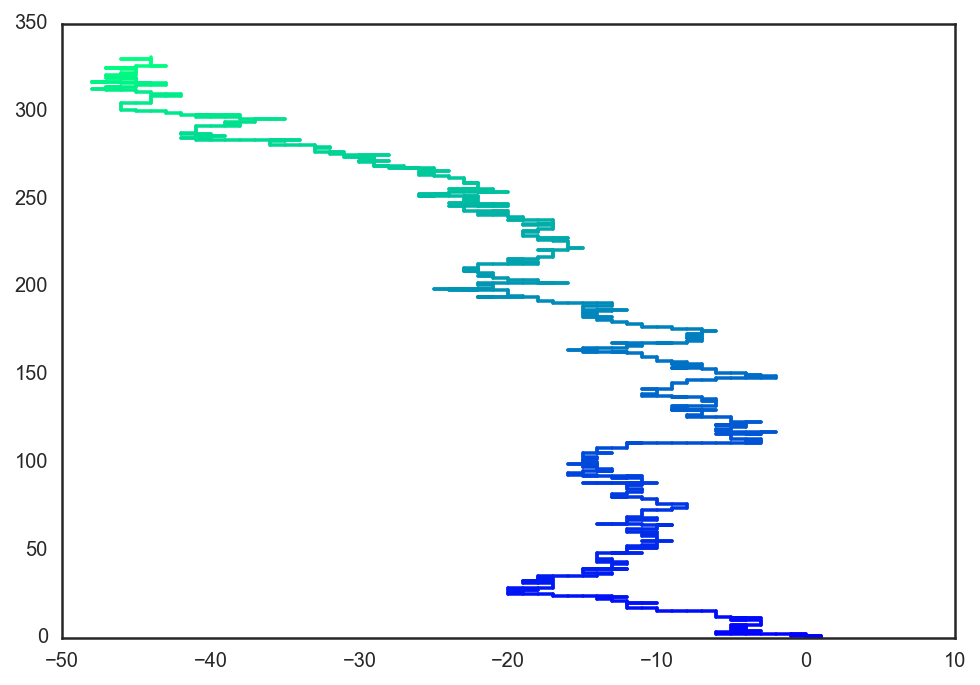

In [387]:
Xpos, Ypos = Motion2D(Steps)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_color_cycle([colors(1.*i/(Steps - 1)) for i in range(Steps - 1)])
for i in range(Steps-1):
    plt.plot(Xpos[i:i+2],Ypos[i:i+2])

Q5: Build a 3-cell spreadsheet to calculate factorials. Report the formula you enter in each cell. Calculate 50! and 120!. You can check the first on your calculator, but the second is probably a larger number than your calculator can handle.

**Q5**

In [388]:
print('50! =', float(scipy.misc.factorial(50)), 'and 120! = ', float(scipy.misc.factorial(120)))

50! = 3.041409320171338e+64 and 120! =  6.689502913449128e+198


In [389]:
print("For 10 walks of 1000 steps...")
tenS = [list(motion()) for k in range(10)]
tenSrev2 = list(np.zeros(0))
def FinalDestination():
    print("Averages of each 1000 steps:")
    for (i, v) in enumerate(tenS):
        tenSrev = tenS[i]
        tenSrev2.append(np.average(tenSrev))
        print('%.3g' % tenSrev2[i])
    return tenSrev2
print("Overall Average: ", np.average(FinalDestination()))

For 10 walks of 1000 steps...
Averages of each 1000 steps:
8.26
21.3
37
16.2
-23.5
8.23
-10.4
-16.3
12.3
-9.79
Overall Average:  4.32107892108


In [454]:
import cufflinks as cf
cf.set_config_file(offline=True, world_readable=False, theme='ggplot')

print("For 1000 walks of 1000 steps...")
tenS = [list(motion()) for k in range(1000)]
tenSrev2 = list(np.zeros(0))
finalV = list(np.zeros(0))
hist = list(np.zeros(100))
def FinalDestination():
    print("Averages of each 1000 steps: (Uncomment out #print('%.3g' % tenSrev2[i]) to see these details...)")
    for (i, v) in enumerate(tenS):
        tenSrev = tenS[i]
        finalV.append(tenSrev[-1])
        tenSrev2.append(np.average(tenSrev))
        hist = Counter(finalV)
        #print('%.3g' % tenSrev2[i])
    return tenSrev2, hist
Results = FinalDestination()
sorted(Results[1], key = Results[1].get, reverse=True)
print("Overall Average: ", np.average(Results[0]))
print("Distribution of Occurances:", Results[1].most_common())
df = pd.DataFrame.from_dict(Results[1], orient='index')
df.iplot(kind = 'bar', yTitle='Total Number of Occurances',
         xTitle='Final Position (k Steps from Origin)',
         title='Frequency Distribution for Final Positions',
         filename = 'cufflinks/categorical-bar-chart')
plt.show()

For 1000 walks of 1000 steps...
Averages of each 1000 steps: (Uncomment out #print('%.3g' % tenSrev2[i]) to see these details...)
Overall Average:  0.593808191808
Distribution of Occurances: [(7.0, 36), (11.0, 33), (5.0, 31), (-5.0, 31), (-1.0, 28), (3.0, 27), (-11.0, 27), (15.0, 25), (-21.0, 25), (-9.0, 24), (-3.0, 24), (-27.0, 23), (9.0, 22), (17.0, 21), (-33.0, 21), (-23.0, 21), (13.0, 20), (25.0, 20), (29.0, 20), (-17.0, 20), (-13.0, 20), (-7.0, 20), (1.0, 19), (21.0, 19), (19.0, 18), (27.0, 17), (37.0, 16), (33.0, 15), (-35.0, 15), (-15.0, 15), (23.0, 14), (-39.0, 14), (-25.0, 14), (-19.0, 14), (31.0, 12), (35.0, 12), (43.0, 12), (-55.0, 11), (-41.0, 11), (-37.0, 11), (45.0, 10), (49.0, 10), (-43.0, 10), (-29.0, 10), (39.0, 9), (47.0, 9), (55.0, 9), (41.0, 8), (-31.0, 8), (-53.0, 7), (-47.0, 7), (59.0, 6), (63.0, 6), (65.0, 6), (51.0, 5), (57.0, 5), (61.0, 5), (-65.0, 5), (-59.0, 5), (-57.0, 5), (-49.0, 5), (75.0, 4), (-51.0, 4), (69.0, 3), (87.0, 3), (-75.0, 3), (-67.0, 3), (-63.

Q6: Using at least 1000 random walkers (2000 or 4000 if you can), measure ∆x using the method just described for N = 50. Repeat 4 times, getting 4 different graphs. Repeat, 4 times each, for N = 100, 400, and 900. (The last one will be really noisy and hard to measure, but do your best.) Put your results in a table with 4 columns (labeled 50, 100, 400, 900) and 1 row for each ∆x. Then, at the bottom of the columns, average the 4 values of ∆x for each N. Submit one graph for each N (a total of 4 graphs) and the table of measurements.
Q7: Propose a hypothesis of how ∆x depends on N. That is, a specific mathematical equation by which you could predict what the spread ∆x should be for a particular N. (Don’t forget that your ∆x values have some uncertainty because they’re a statistical sample; don’t treat them as exactly known quantities.) Be sure that your equation makes the correct prediction for N = 0. Then use your hypothesis to predict ∆x after 10,000 steps. 
Q8: In the diffusion of a gas from a point source, the number of “steps” in the random walk is essentially the number of collisions a molecule has with other molecules. At a given pressure and temperature, the number of collisions is proportional to the time t since the molecules were released. That is,   where   is the proportionality symbol. Based on this, how should the spread of a diffusing cloud of gas atoms depend on t? Give your answer as   ____ where some function of t goes in the blank. Explain your reasoning.


**Q6**: lol, yeah I'm skipping this. Busy Work.
**Q7**: Delta x is inversely proportional to the square root of N.
**Q8** Collisiions are a function of 1/t... But really, this question is not well written.


## Extra Credit, bruh. 

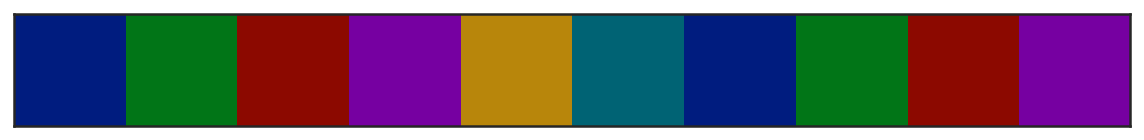

In [462]:
sns.set()
sns.set_context("poster")
current_palette = sns.color_palette("dark", 10)
sns.set(style="white", palette=current_palette)
sns.palplot(current_palette)

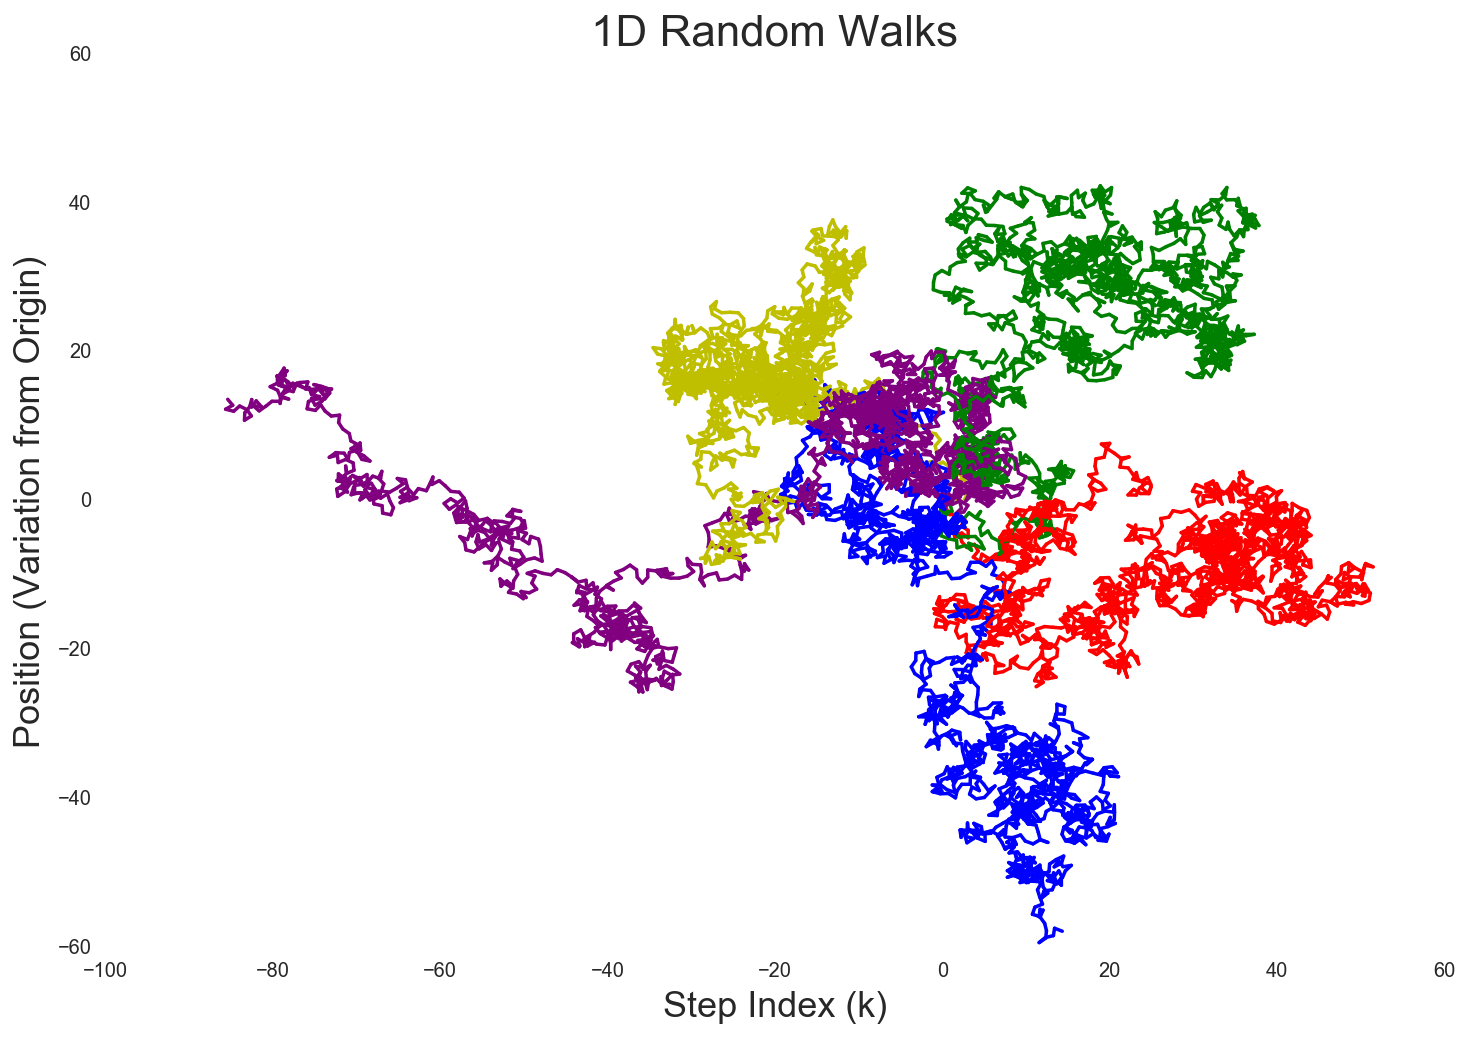

In [496]:
Steps = 2000
def r360Motion2D(Steps):
    xPos = np.zeros(Steps); yPos = np.zeros(Steps); xs = ys = 0; 
    xPos[0] = xs; yPos[0] = ys;
    for i in range(1, Steps):
        choice = np.random.random()*2*np.pi
        xs += np.cos(choice)
        ys += np.sin(choice)
        xPos[i] = xs;
        yPos[i] = ys;
    return xPos, yPos

Results = [list(r360Motion2D(Steps)) for k in range(5)] ## WAYYYY TOOO LAZY TO SHORTEN THIS CODE
fir = Results[0]; fX1 = fir[0]; fY1 = fir[1];
sec = Results[1]; fX2 = sec[0]; fY2 = sec[1];
thi = Results[2]; fX3 = thi[0]; fY3 = thi[1];
fou = Results[3]; fX4 = fou[0]; fY4 = fou[1];
fif = Results[4]; fX5 = fif[0]; fY5 = fif[1];

fig, ax = plt.subplots(figsize=(12, 8));
ax.set_ylabel("Position (Variation from Origin)", fontsize = 18);
ax.set_xlabel('Step Index (k)', fontsize = 18);
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on") 
plt.title('1D Random Walks', fontsize = 22)

for i in range(Steps - 1):
    plt.plot(fX1[i:i+2], fY1[i:i+2], 'g', 
             fX2[i:i+2], fY2[i:i+2], 'b',
             fX3[i:i+2], fY3[i:i+2], 'r',
             fX4[i:i+2], fY4[i:i+2], 'y',
             fX5[i:i+2], fY5[i:i+2], 'purple')
    
plt.show();

#### Not gonna set the limits to the above plot since it looks better without it. 

## FUN STUFF BELOW WOO! (Moar Extra Credit, MOAR!)

In [325]:
# Return the entire trajectory from randomly walking in one of six
# directions for a given number of steps
def rMotion3D(Steps):
    xP = np.zeros(Steps); yP = np.zeros(Steps); zP = np.zeros(Steps);
    xs = 0; ys = 0; zs = 0;
    xP[0] = xs; yP[0] = ys; zP[0] = zs;
    for i in range(1, Steps):
        choice = np.random.randint(0,5)
        if choice == 0:
            xs += 1;
        elif choice == 1:
            ys += 1;
        elif choice == 2:
            xs -= 1;
        elif choice == 3:
            ys -= 1;
        elif choice == 4:
            zs += 1;
        else:             
            zs -= 1;
        xP[i] = xs; yP[i] = ys; zP[i] = zs;
    return xP, yP, zP;

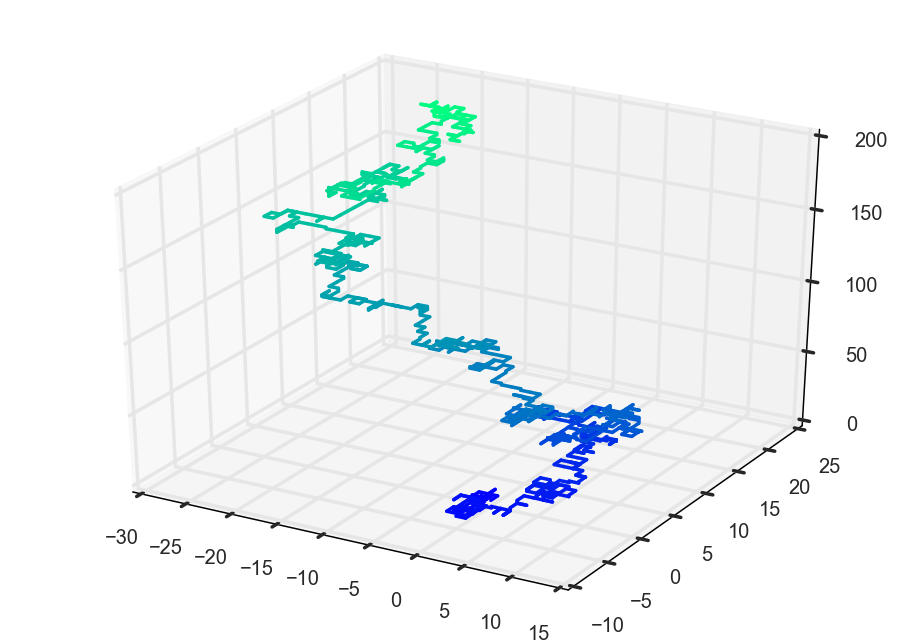

In [189]:
import mpl_toolkits.mplot3d.axes3d as p3;
Steps = 1000;
xP, yP, zP = rMotion3D(Steps);

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_color_cycle([cm(1.*i/(Steps-1)) for i in range(Steps - 1)])
for i in range(Steps - 1):
    ax.plot(xP[i:i+2], yP[i:i+2], zP[i:i+2])

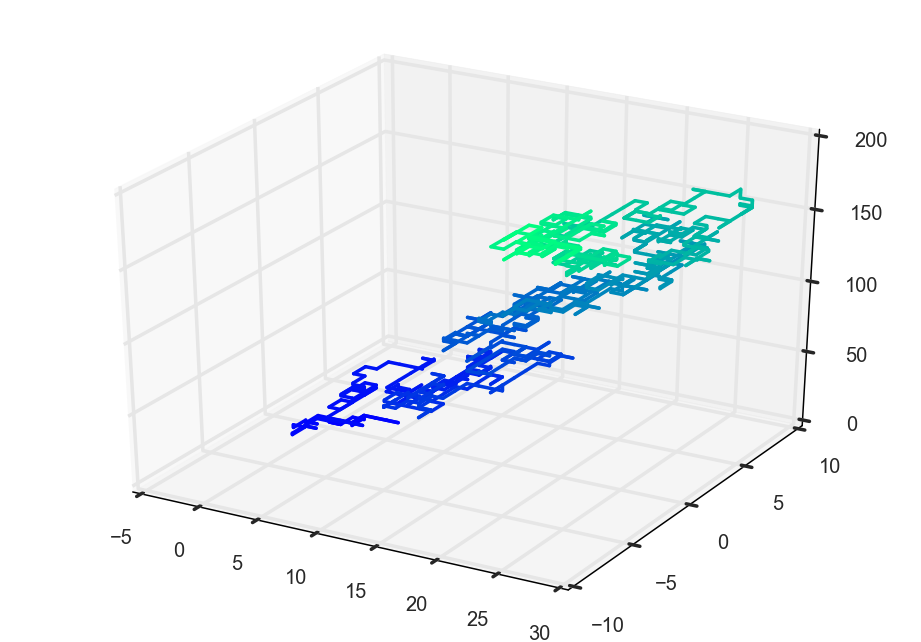

In [190]:
numSteps=10000
xP, yP, zP = rMotion3D(Steps);

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_color_cycle([cm(1.*i/(Steps-1)) for i in range(Steps - 1)])
for i in range(Steps - 1):
    ax.plot(xP[i:i+2], yP[i:i+2], zP[i:i+2])